In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

def list_unique_csv_files(directory):
    csv_files = set()
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv') and not file.startswith('rp'):
                csv_files.add(os.path.join(root, file))
    return list(csv_files)

unique_csv_files = list_unique_csv_files('out')

for i, file in enumerate(unique_csv_files):
    print(i, file)

0 out/MODEL_3/mu : 0.15, spike_value : 3, numDiffLocs : 20, num_spikes : 10, /2025-01-22_19:45.csv
1 out/MODEL_1/mu : 0.15, numDiffLocs : 20, /2025-01-23_11:34.csv
2 out/MODEL_1/mu : 0.25, numDiffLocs : 20, /2025-01-22_18:50.csv
3 out/MODEL_1/mu : 0.25, numDiffLocs : 20, /2025-01-23_12:14.csv
4 out/MODEL_1/mu : 0.25, numDiffLocs : 20, /2025-01-22_18:39.csv
5 out/MODEL_2/num_spikes : 10, spike_value : 5, /2025-01-22_19:13.csv
6 out/MODEL_2/num_spikes : 10, spike_value : 5, /2025-01-22_19:41.csv
7 out/MODEL_1/mu : 1.5, numDiffLocs : 20, /2025-01-21_17:09.csv
8 out/MODEL_3/mu : 0.15, spike_value : 3, numDiffLocs : 20, num_spikes : 10, /2025-01-22_20:08.csv
9 out/MODEL_2/num_spikes : 10, spike_value : 10, /2025-01-21_18:04.csv
10 out/MODEL_3/mu : 0.25, spike_value : 3, numDiffLocs : 20, num_spikes : 10, /2025-01-23_12:28.csv
11 out/MODEL_2/num_spikes : 10, spike_value : 7, /2025-01-21_19:52.csv
12 out/MODEL_1/mu : 0.3, numDiffLocs : 20, /2025-01-22_19:38.csv
13 out/MODEL_2/num_spikes : 10,

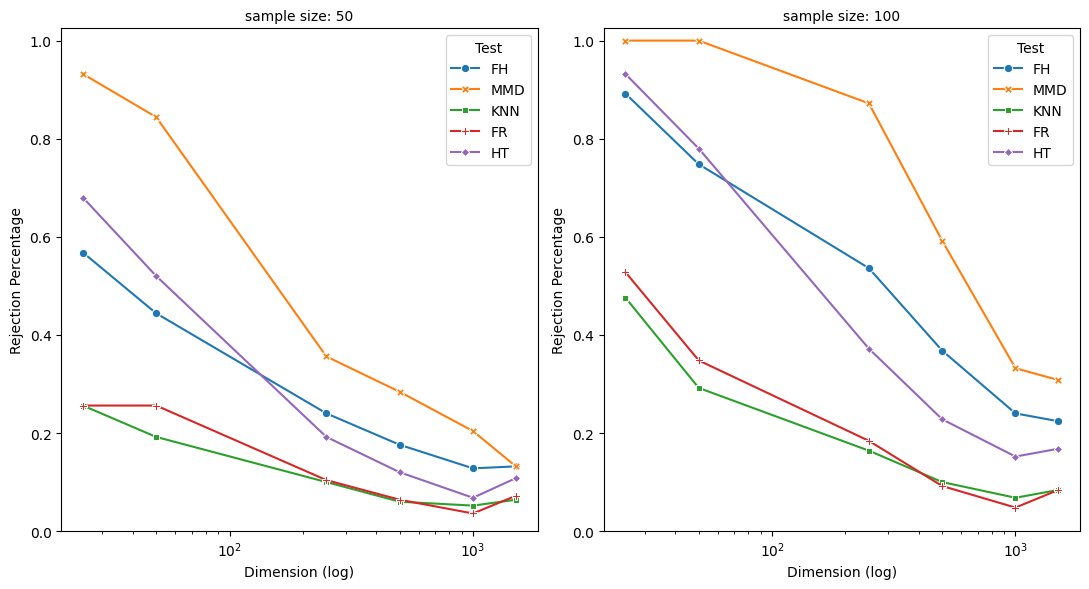

In [ ]:
file = unique_csv_files[3]

df = pd.read_csv(file)
ns = df['sample size'].unique()

fig, axs = plt.subplots(figsize=(5.5*len(ns) , 6), ncols = len(ns))

for n,ax in zip(ns,axs):
    sns.lineplot(data=df[df['sample size'] == n], x="dimension",  y="percent of rejections", hue="test",style="test", markers=True, dashes=False, ax=ax)
    ax.set_xlabel("Dimension (log)")
    ax.set_ylabel("Rejection Percentage")
    ax.set_title('sample size: {}'.format( n), fontsize = 10)
    ax.legend(title="Test")
    ax.set_ylim(0, 1.025)
    ax.set_xscale('log') 
    plt.tight_layout()
# fig.savefig(f'figures/sims__{file.split("/")[1]}.png')